# Altcoin Price Prediction Project - Report
Can we predict the price of altcoin cryptocurrencies, and profit by trading them based on the forecast?

## Abstract

Either high-cap or low-cap cryptocurrencies are investment opportunities. This project's main objective is to develop models that are capable of predicting altcoin cryptocurrency close prices, as well as forecast prices. Altcoins generally have high volatility and large price swings, which are conducive to short-term trading. We look at short / long term trading and low-cap coins. Additionally, there is a function that will be utilized to measure the profit, this function will take into account transaction fees in order to calculare the total profit. 
With cryptocurrency interest on the rise, there are many investment (short-term or long-term) opportunities, especially due to the volatility of certain digital assets. The cryptocurrency market is tough to predict, just as the stock market, so we aim to create simple and complex models which are capable of forecasting low-cap coins and altcoins, which are generally subjected to larger price swings. Using these models, the ultimate goal is to profit through trading these assets. We do this using autoregression, MACD and Bollinger Bands, and LSTM models. We test on historical price data of many different cryptocurrencies, and forecast using more recent data gathered from CoinAPI.

## Introduction

Bitcoin is a digital currency, introduced in 2008 by Nakamoto. It is enabled by the blockchain technology and allows for peer-to-peer transactions secured by cryptography. In this study, we analyze the short-term predictability of the high-cap or low-cap cryptocurrencies . Therefore, we utilize a variety of machine learning methods and consider a comprehensive set of potential market-predictive features.

Empirical asset pricing is a major branch of financial research. Machine learning methods have been applied increasingly within this domain, due to the ability to flexibly select amongst a potentially large number of features and to learn complex, high-dimensional relationships between features and target. Although a considerable body of research has examined the pricing of equities and bonds, yielding in a substantial number of potentially market-predictive factors, less attention has been paid to the novel stream of cryptocurrency pricing. In particular, the short-term predictability of the bitcoin market has not yet been analyzed comprehensively. Furthermore, most studies have solely considered technical features and have not analyzed the feature importance of the employed machine learning models. Against this backdrop, we tackle this research gap by comparatively analyzing different machine learning models for predicting market movements for altcoins. In this context, our overarching research questions are:

RQ: Can machine learning models predict short-term/long-term movements of the altcoins? Can we predict shitcoins?

## Background

Autoregression models, such as ARIMA, VAR, VARMA, as well as LSTM models have been used to model and forecast cryptocurrency prices.

1. Short-term bitcoin market prediction via machine learning (Patrick Jaquart, David Dann, Christof Weinhardt)
2. As a guide for terminology https://www.investopedia.com
3. Autoregressive Integrated Moving Average (ARIMA) Model for Forecasting Cryptocurrency Exchange Rate in High Volatility Environment: A New Insight of Bitcoin Transaction https://www.researchgate.net/publication/321375630_Autoregressive_Integrated_Moving_Average_ARIMA_Model_for_Forecasting_Cryptocurrency_Exchange_Rate_in_High_Volatility_Environment_A_New_Insight_of_Bitcoin_Transaction

## Data

The analysis will only focus on the pricing information, leaving aside any factor which may impact the price of Bitcoin, like for example, news, which can play a very important rule. Price history is available on a daily basis starting from 2013. The datasets used for this project have the historical price information of some of the top crypto currencies by market capitalization. The dataset used for this project is from Kaggle https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory 

Data Content: 

- Date : date of observation
- Open : Opening price on the given day
- High : Highest price on the given day
- Low : Lowest price on the given day
- Close : Closing price on the given day
- Volume : Volume of transactions on the given day
- Market Cap : Market capitalization in USD

The data was derived from [Blockchain's website](http://www.blockchain.com/explorer), which includes the variables mentioned above. 

There are generally no missing values in the historical data, so no imputation is necessary. For autoregression, the data is loaded into a dataframe and a datetime index is created out of the date values provided. Additionally, the closing price, which is the only endogenous variable used in the autoregression model, is scaled using the natural logarithm, and time-series differenced.

## Methodology

To tackle the previously-outlined research gap, we systematically evaluate different prediction models, features, and horizons. We used technical analyses. Thereby, we implement data gathering, preprocessing, and model building using the Python programming language. We do this using autoregression, MACD and Bollinger Bands, and LSTM models. 

##  Features Engineering

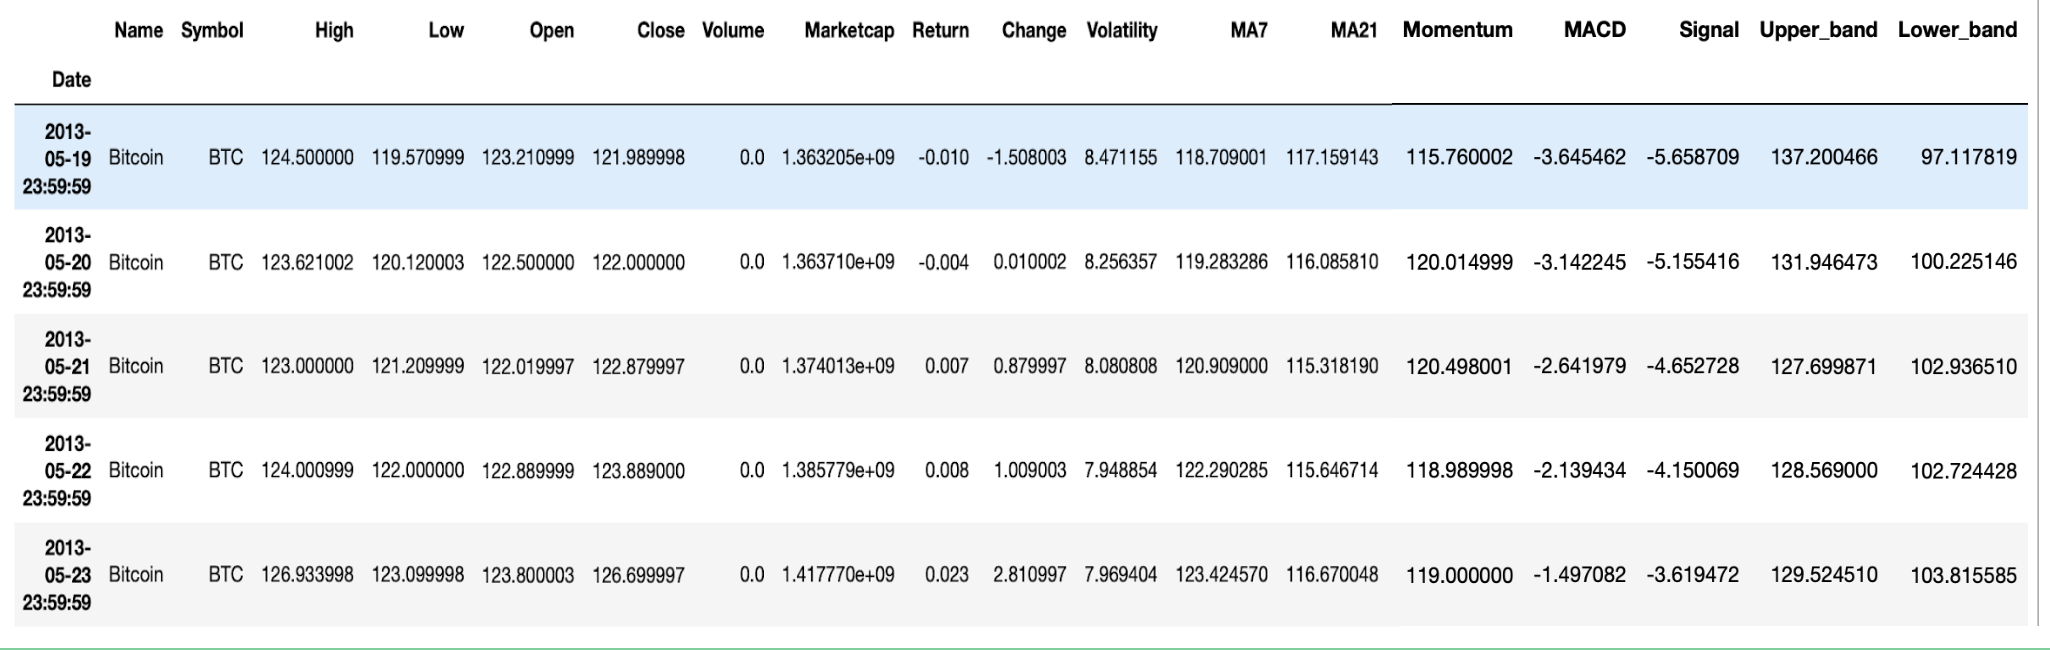

#### Figure 1: Updated DataFrame with new features

### Technical Indicators

Moving Average (lagging) analyze whether a market is moving up, down, or sideways over time.

Bollinger Bands (lagging) measure how far a price swing will stretch before a counter impulse triggers a retracement.

MACD (leading) evaluate the speed of price change over time.

Volume indicators (leading or lagging) tally up trades and quantify whether bulls or bear are in control.

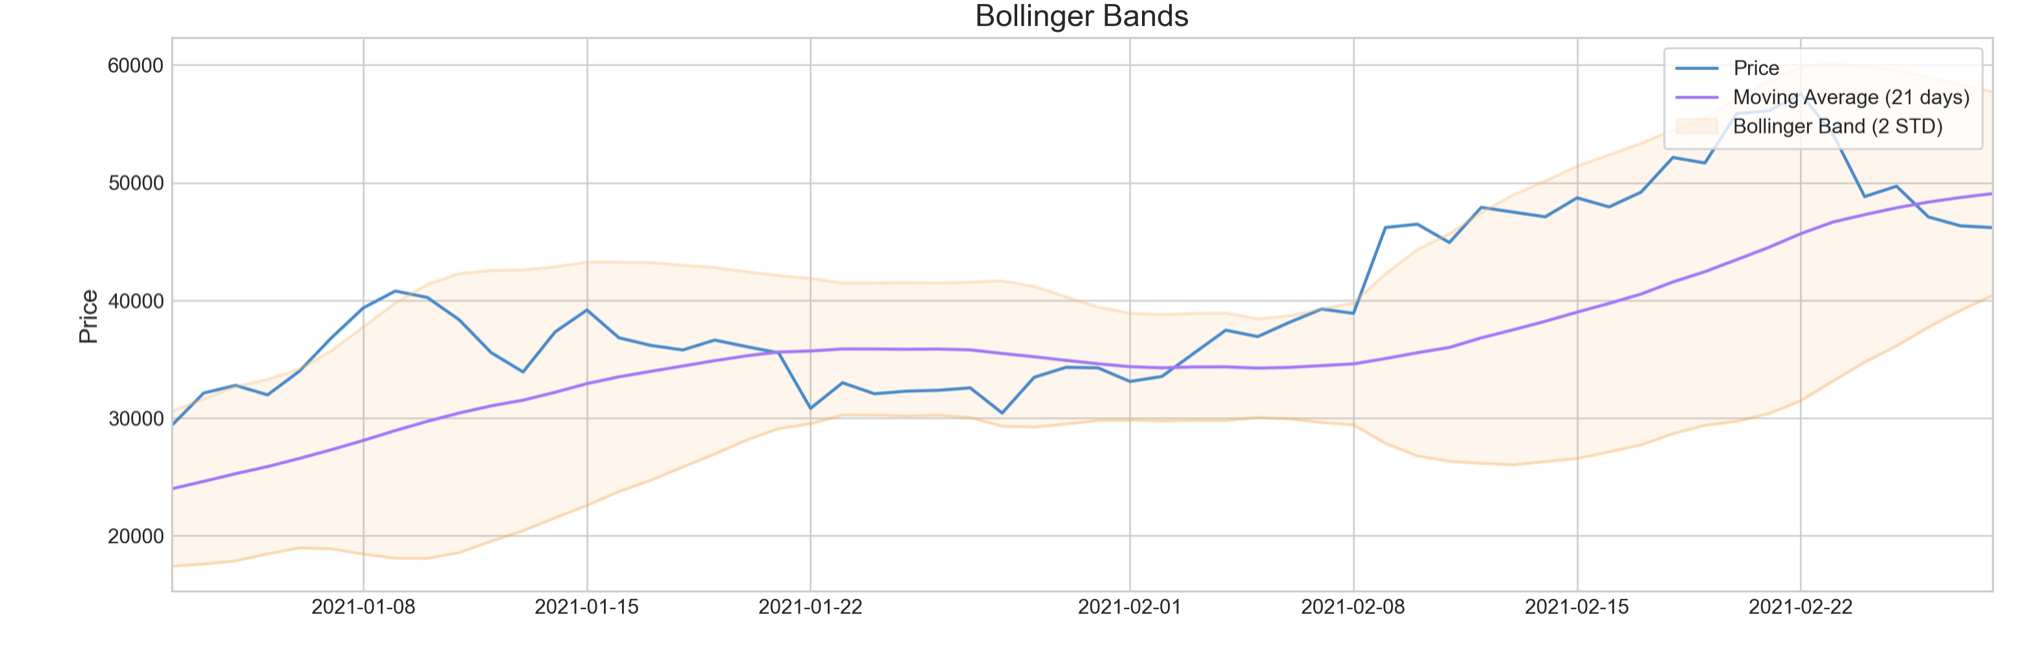

#### Figure 2: Bollinger Bands for Bitcoin

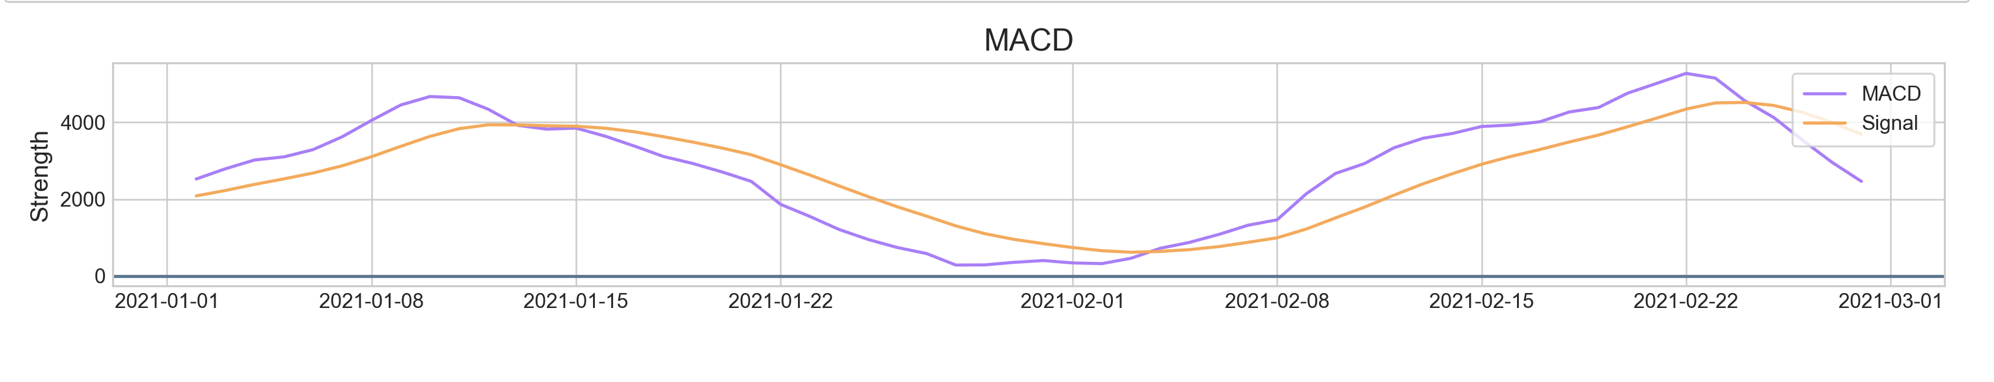

#### Figure 3: MACD for Bitcoin

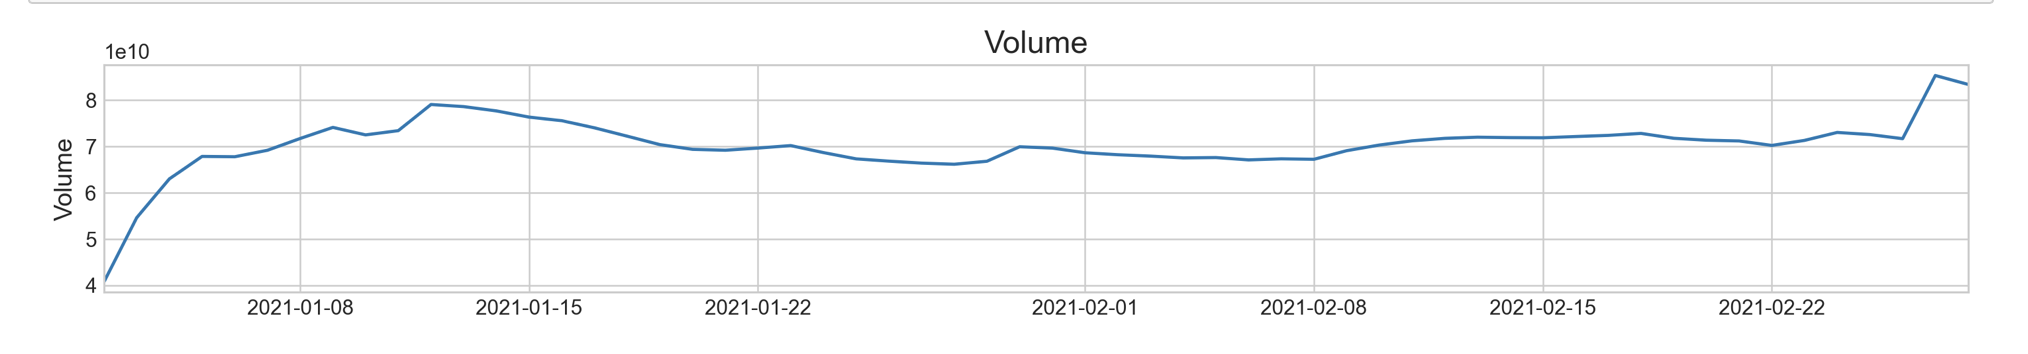

#### Figure 4: Volume for Bitcoin

### Correlation among cryptocurrencies

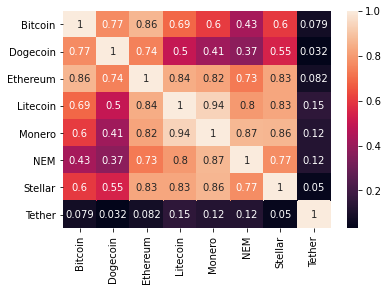

#### Figure 5: Correlation matrix among cryptocurrencies' closing price

This has not been directly implemented or used as inputs to any of the models that were used in this project, however it has helped us build an understanding on the relationship among cryptocurrencies. Dogecoin, Ethereum, and Litcoin seem to have a strong correlation with Bitcoin. The next step, is to break the correlation matrix into 4 seasons, to see if it varies significantly.

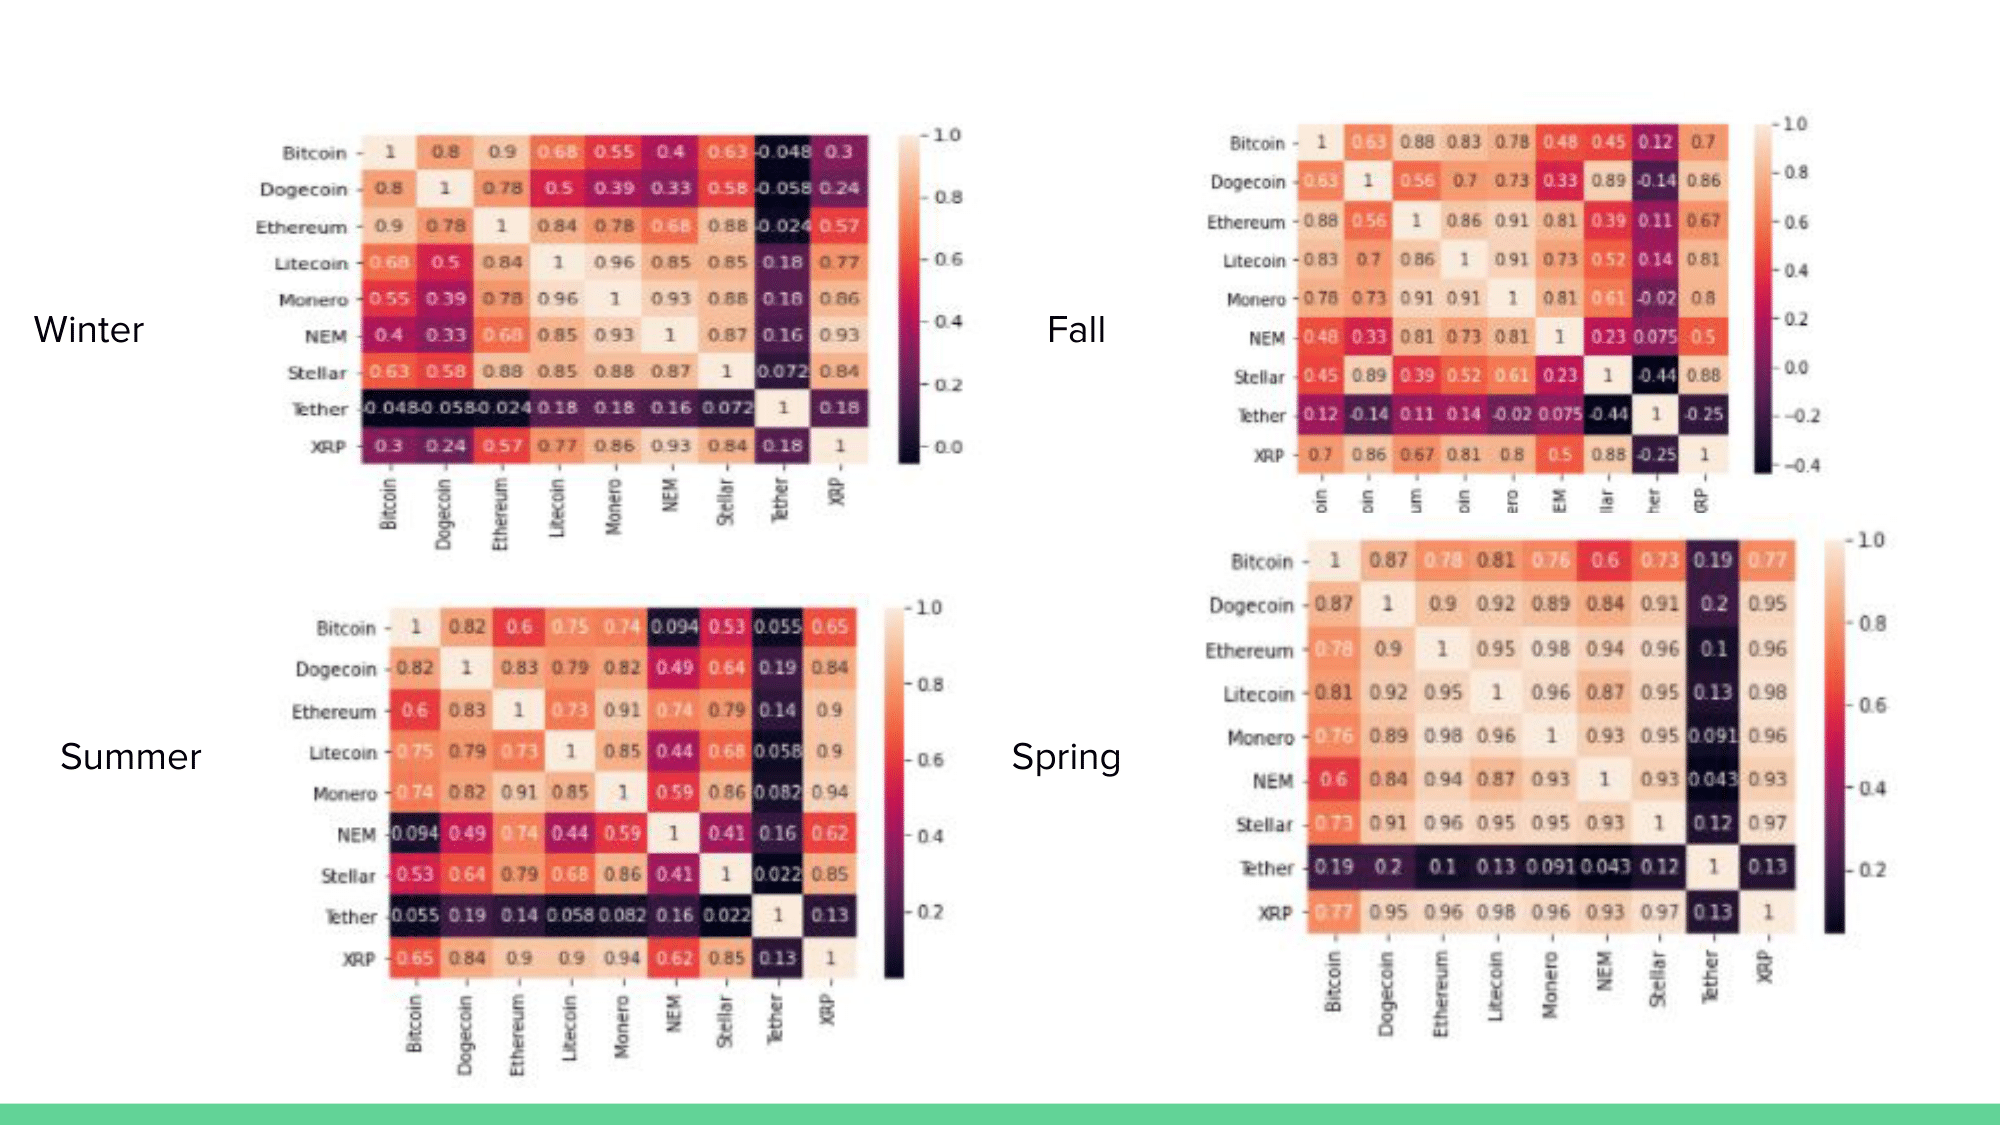

#### Figure 6: Correlation matrix among cryptocurrencies' closing price grouped by seasons

### Technical Analysis

#### Basiline model

Baseline models is a benchmark for evaluation of more complex models. Baseline model predict return in 2 days.

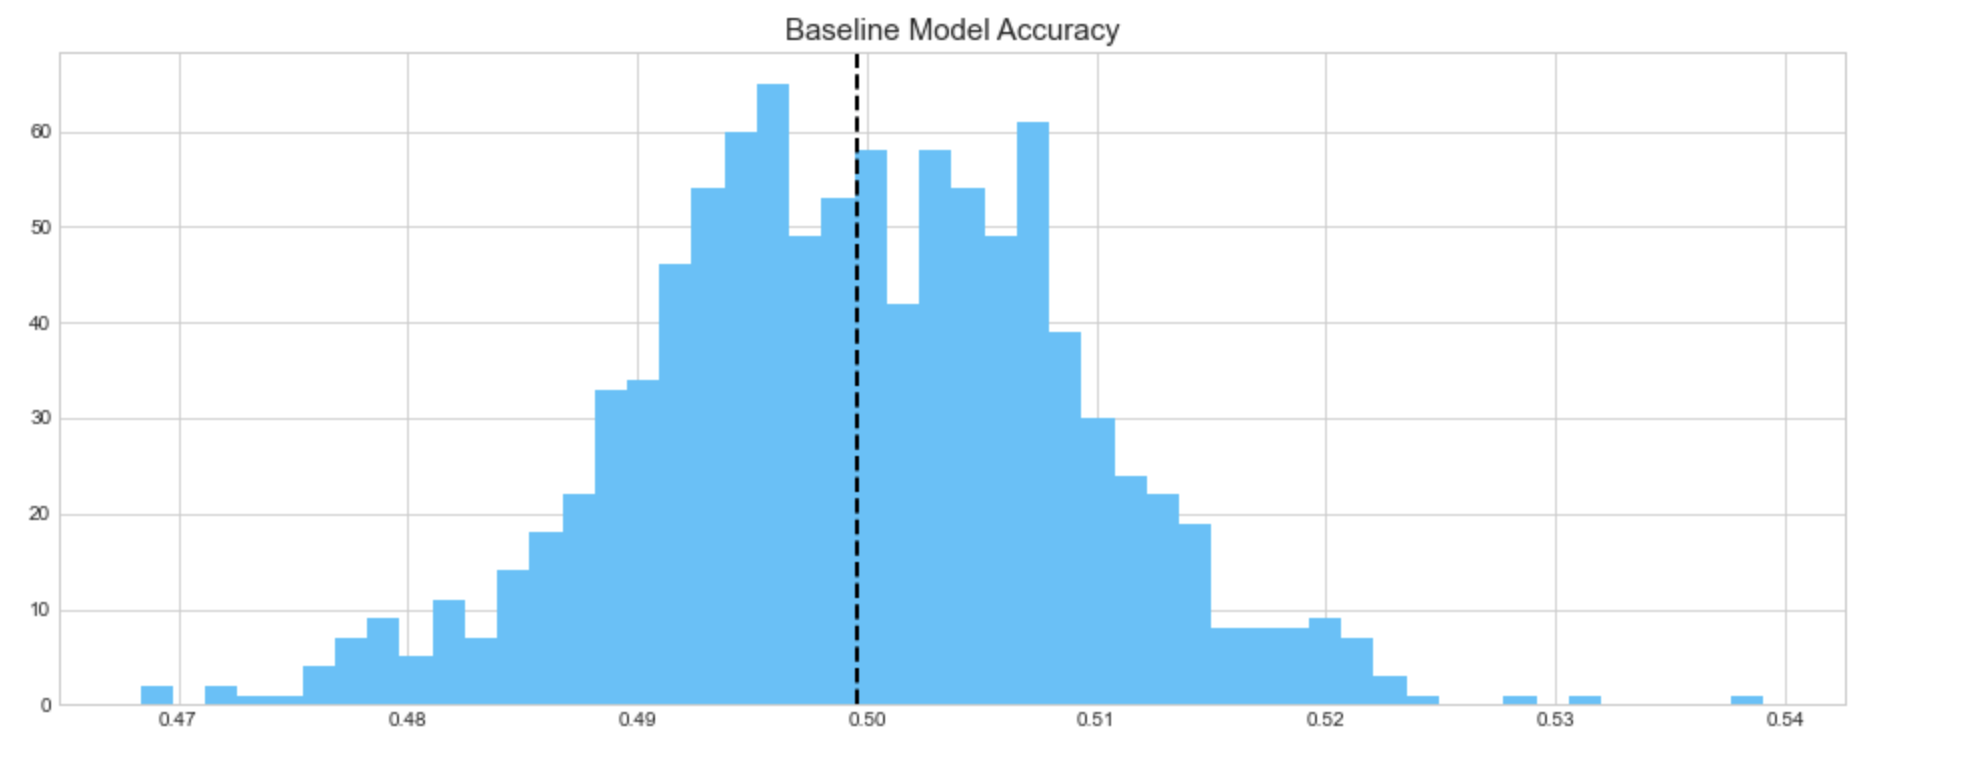

#### Figure 7: Baseline Model Accuracy

#### Using Bollinger Bands to Make Decision

Simple trading strategy based on technical indicators, such as Bollinger Bands and MACD can work as short-term trading technique.

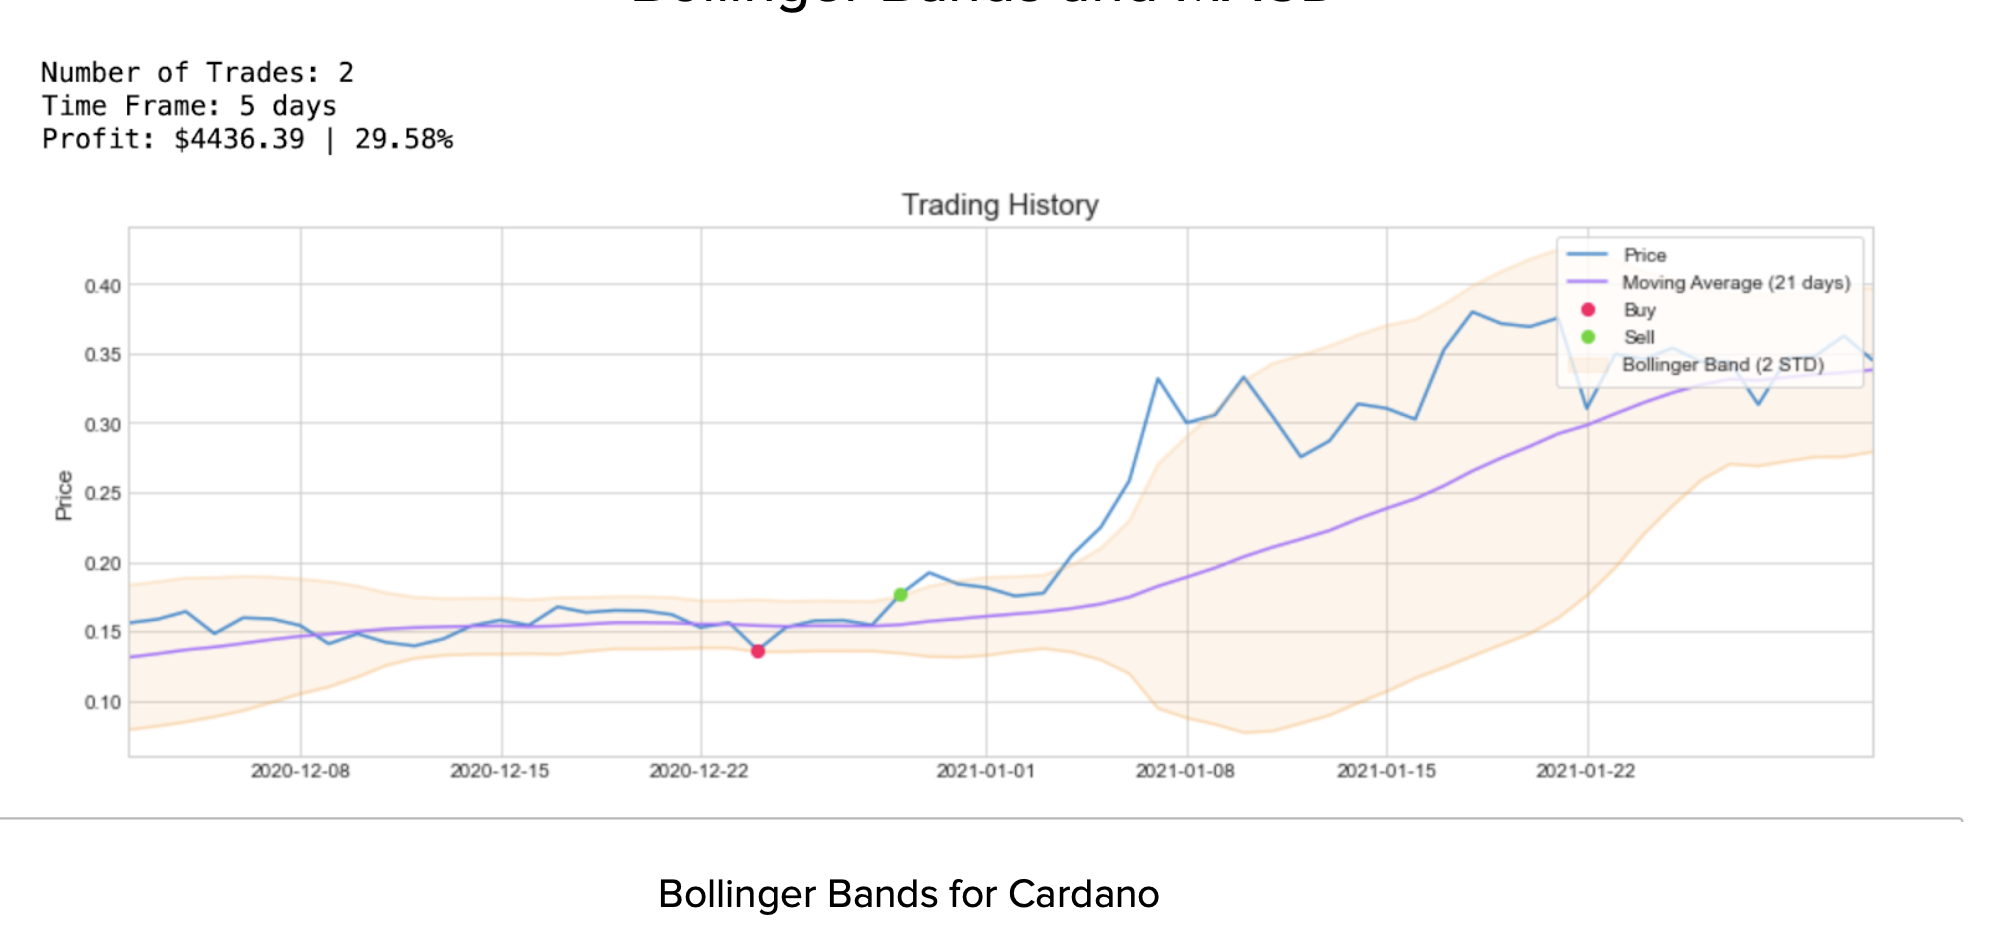

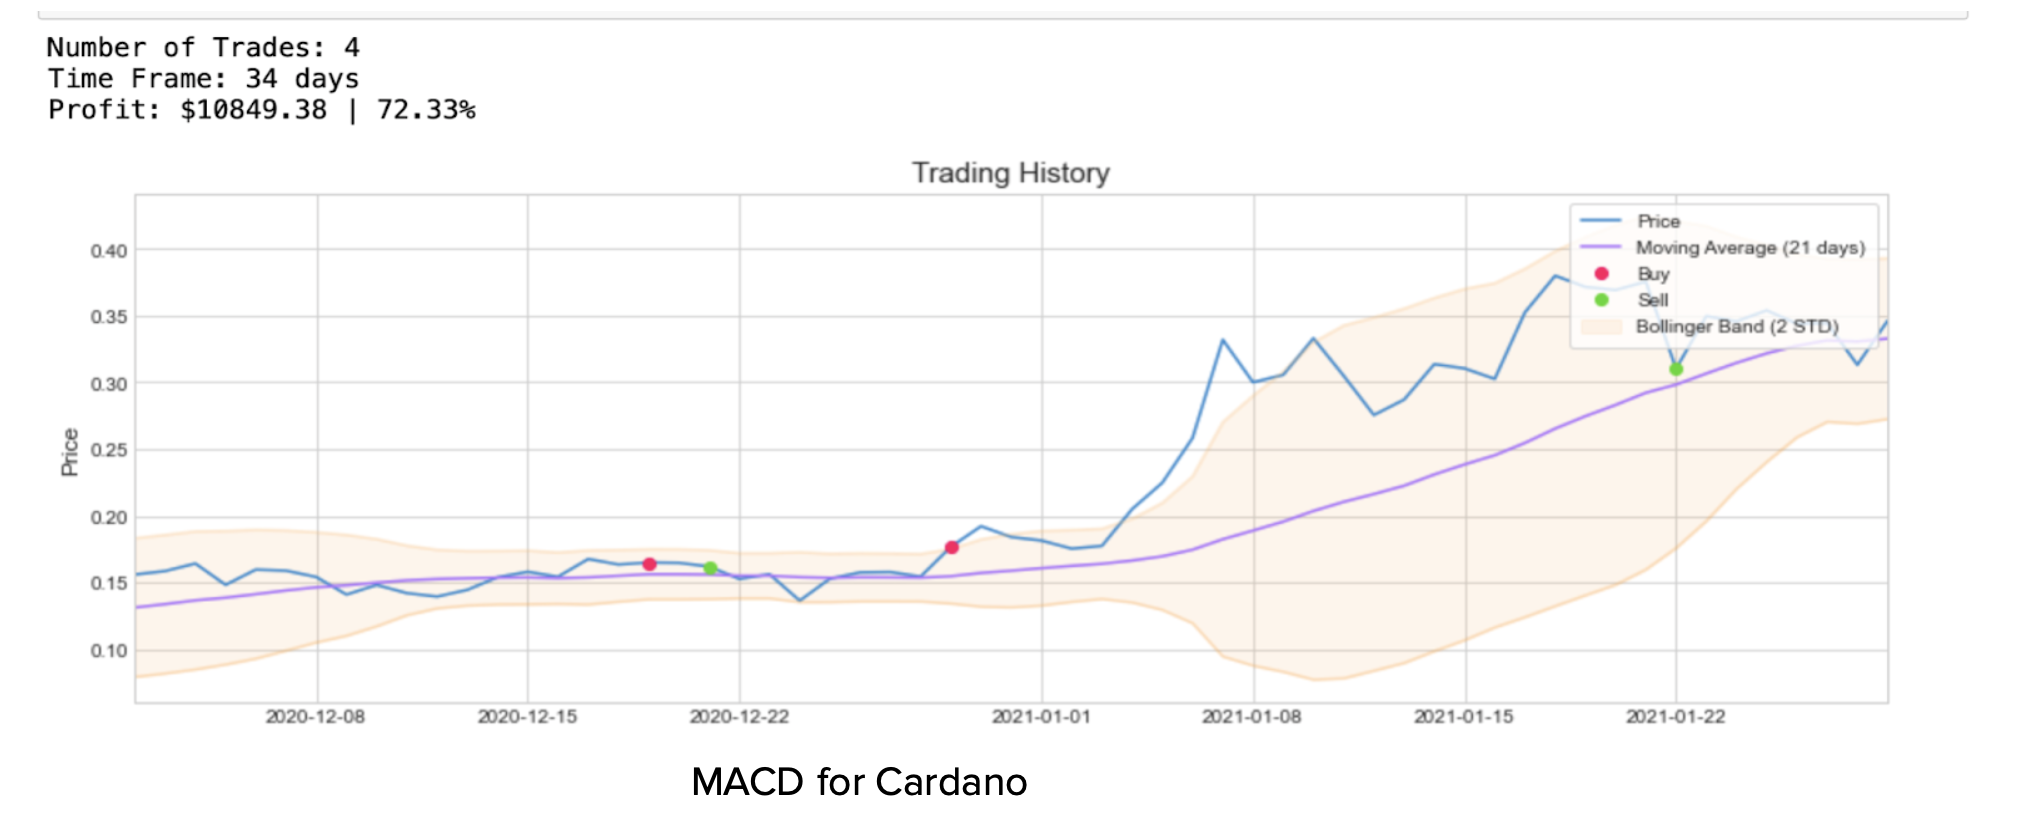

#### Figure 8: Trading history of Cardano (Bollinger Bands and MACD)

### Autoregression model

The most simple model to apply to this problem is an autoregression model, imported from the statsmodel python package. First, the close price feature variable of an example coin, Cardano / ADA, is explored visually through plots. Namely, a lag plot and an autocorrelation plot, to see if the time-series we have is suitable for autoregression.

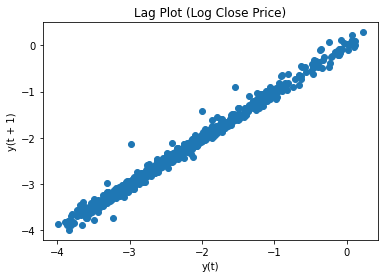

#### Figure 9: Lag Plot of the natural logarithm of the close price of Cardano

The correlation in the lag plot (lag of 1) suggests that an autoregressive model is appropriate. Next, the autocorrelation plot shows some possible values of lag orders for the model.

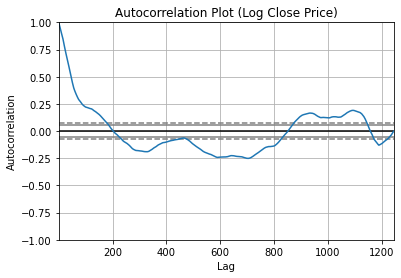

#### Figure 10: Autocorrelation Plot of the natural logarithm of the close price of Cardano

The autocorrelation plot shows that the correlation among the current value and the past ~200 values is statistically significant, and that the significance past a lag of 200 varies and may not be as significant as the previous values. 

Finally, an Augmented Dickey–Fuller test is used to test for stationarity of the data. The autoregression model should not be used on a non-stationary time series, so this is a way to see if we need to difference the close price series before training the model. The results of the first test return a p-value of 0.84, and an ADF-statistic of -0.71, with critical values below -2.568 starting at the 10% threshold. This suggests that the close price of ADA is not stationary. The pandas series method .diff() will be used to difference the close price.

After differencing the series, the results of the second test return a p-value of 0.0045, and an ADF-statistic of -4.30, with critical values below -2.57 starting at the 10% threshold. This suggests that after differencing, the close price series is now stationary. Now, a function is used to train the model over a range of lag values, and selects the best lag values by maximizing the hit rate, or the amount of days on which the model correctly predicts the sign of the percent change of the asset. Then, it minimizes the mean squared error of the predictions and selects the appropriate lag value, which also depends on the amount of days forecasted.

Now, a function is used to train the model over a range of lag values, and selects the best lag values by maximizing the hit rate, or the amount of days on which the model correctly predicts the sign of the percent change of the asset. Then, it minimizes the mean squared error of the predictions and selects the appropriate lag value, which also depends on the amount of days forecasted.

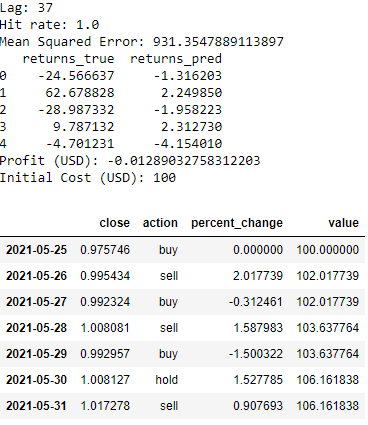

#### Figure 11: Output of the autoregression model

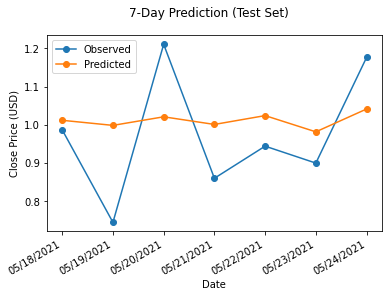

#### Figure 12: Prediction of Cardano price on the hold-out set

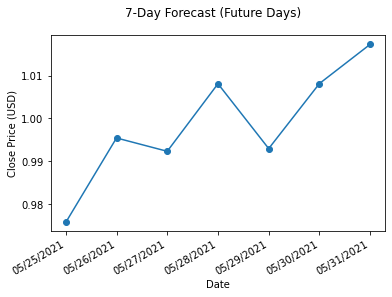

#### Figure 13: Future prediction of 7 days past the end of the hold-out set

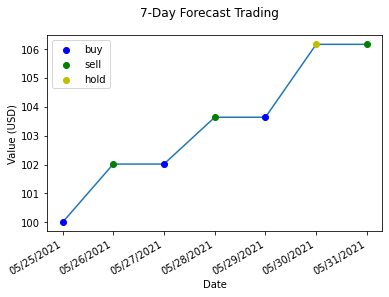

#### Figure 14: Trading scheme for the 7-day forecast

The model outputs a plot of the observed samples versus the predicted samples in the hold-out set, as well as a forecast based on the forecasted number of days input in the function, and a very rough trading guideline, which does not take into account profit-taking. Of course, the numbers here are the differenced values, so the values must be cumulatively summed in order to invert the differencing and return the close price in USD.

### LSTM Model 
Long-Short Term Memory (LSTM) is a type of RNN that allows us to process not only single data points (such as images) but also entire sequences of data (such as speech or video). They are a great choice for time series forecasting, and they are the type of architecture we will be using today. For this particular model, Dogecoin will be used as an experiment to test the model's performance. Let's begin by how the dataset looks like.

#### Experimenting with Dogecoin

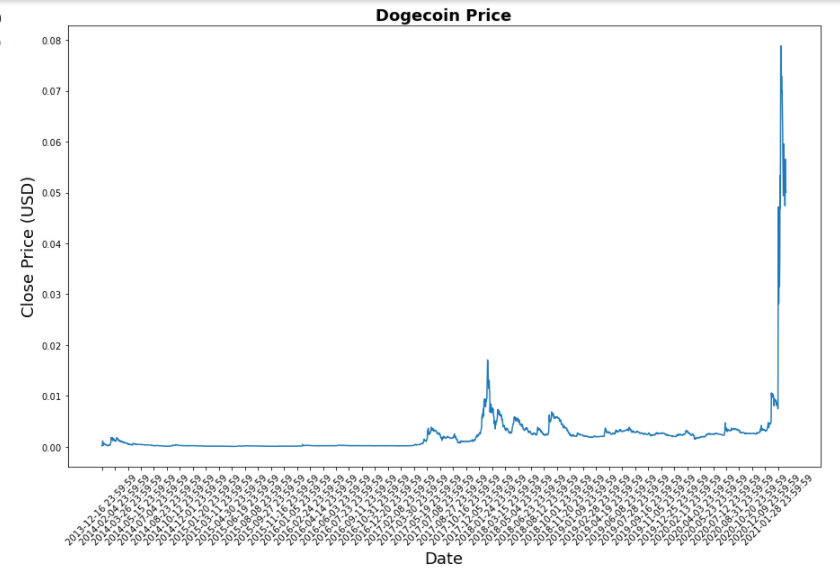

#### Figure 15: Closing price of Dogecoin everyday
There is data available for Dogecoin ranging from 2013 to 2021. Dogecoin has been 'dead in the water' as a cryptocurrency, but has gained significant growth in late 2020.


#### Experimenting with Cardano

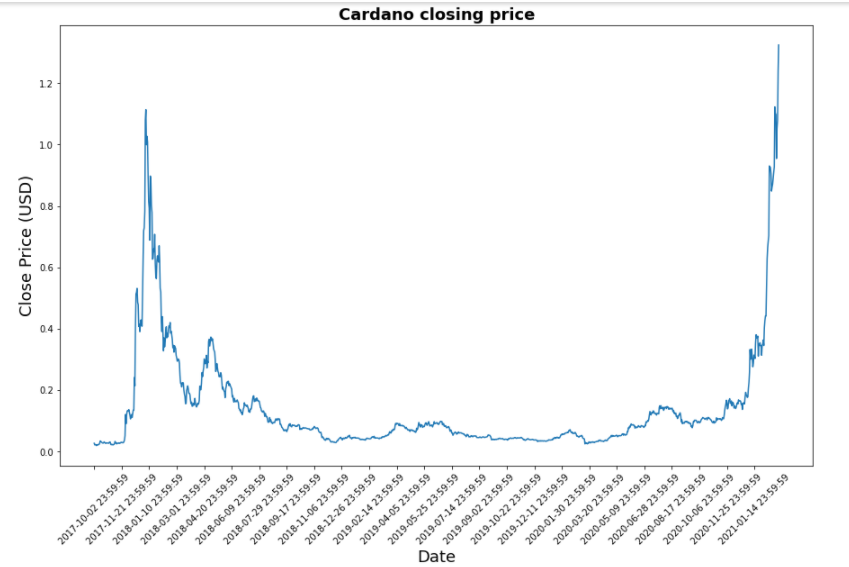

####  Experimenting with Litecoin and Ethereum 

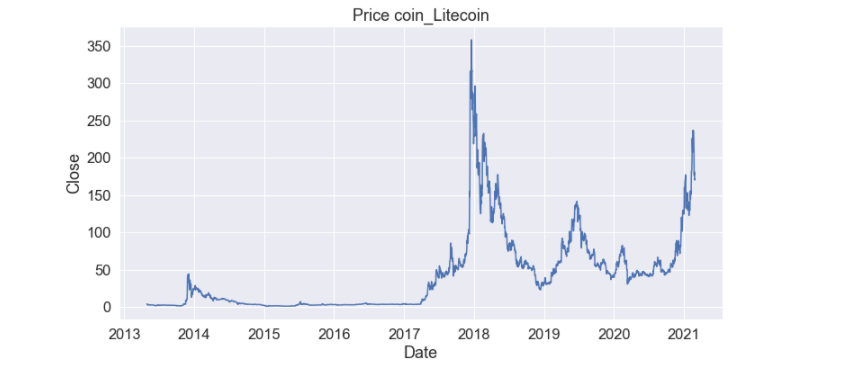

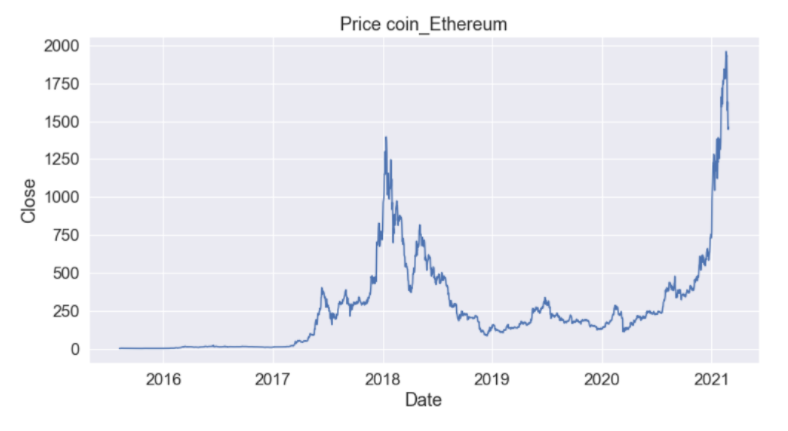

#### Figure 16: Closing price value of Dogecoin with respect of time.

#### Data preprocessing steps

- Transform the closing price of the data using MinMaxScaler, so that the range of the values are from 0 to 1. This will help the model to converge
- Creating a sequence of a specified length at position 0. Each position is shifted to the right (1 step) and create another sequence. The process is done repeatedly until all positions in the training dataset are covered.
- Split data to train and testing set

### Building a Neural Network

- This model is built with three LSTM Layers and one dense layer which is the ouput layer

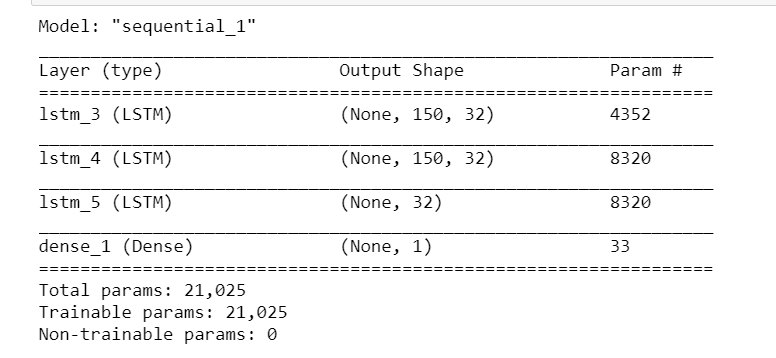

### Optimizers "adam" and Loss "MSE"  - Plotting Training Loss

 - Loss function also called error function is used to train models of neural network loss functions, in order to assign the correct weight to produce output.
 - MSE is used to calculate the error and/or loss.
 - As the loss function value goes near to zero the models weight produce correct relationship between input and output. Here input is the date and the output is the value of the coins.

## Evaluation

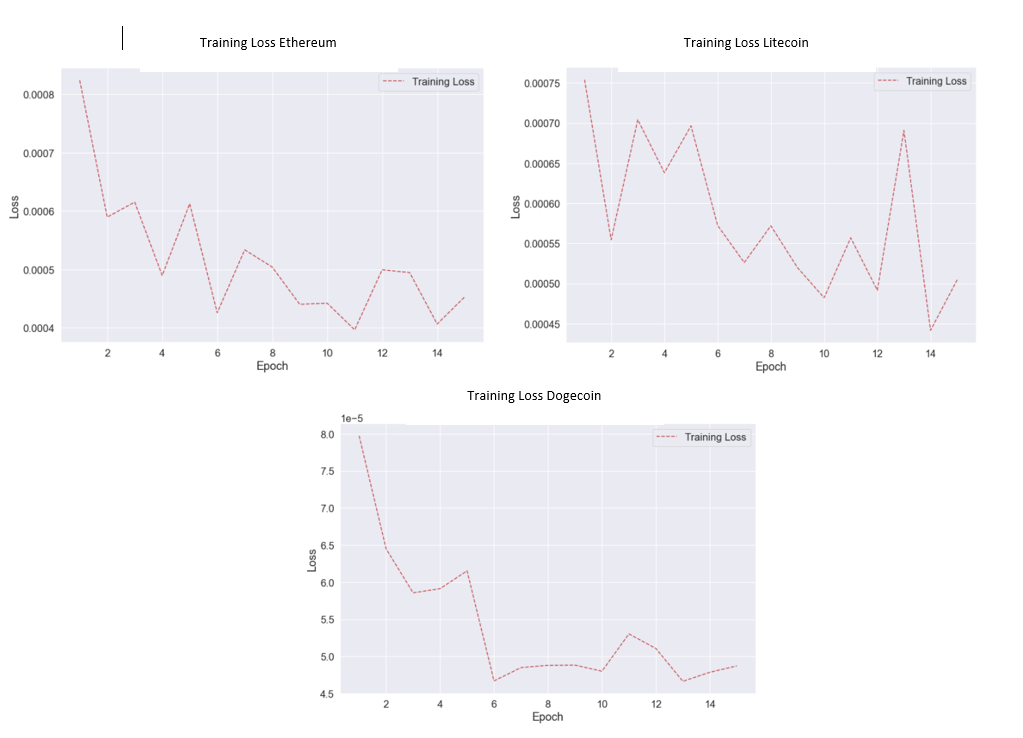

#### LSTM Final Model Performance on Dogecoin 

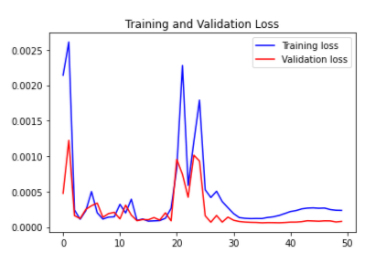

#### Figure 17: Train and Validation loss with respect to the number of epochs the model has performed
The cutoff was 15 epochs, where the training loss almost matched the validation loss. After 35 epochs the model seems to be overfitting.

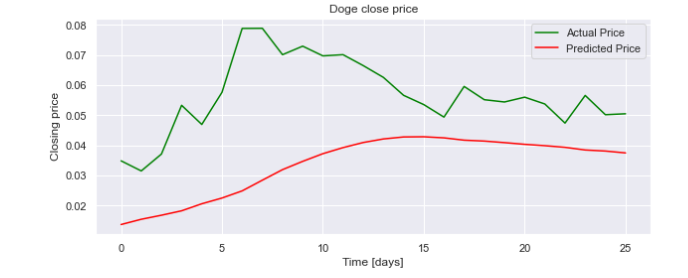

#### Figure 18: Actual price versus the predicted price of the closing value of Dogecoin, for the last 25 days that were included in the dataset.


Though it may not seem that the prediction is close to the actual price, the model is able to predict at the very least the trend of the data day by day, given the previous sequence which based its prediction on. 

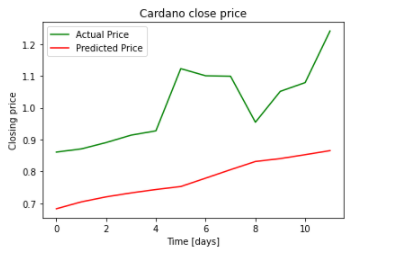

#### Figure 19:  Actual price versus the predicted price of the closing value of Cardano, for the last 25 days that were included in the dataset.

Same goes here. The pattern/trend seems to be captured though there is a significant difference in the value. In this case 10 days are used as the test set, because the data that we have for Cardano is from 2017-2021.

## Conclusion

In the grand scheme of things, we have created models that have different tradeoffs, that are able to predict low-cap cryptocurrencies' values to a certain extent. We examined the simple autoregression model, the Bollinger Bands and MACD methods, and the LSTM model. We have more than enough data, which allows us to use larger lag values if the forecast is longer-term. The LSTM model is promising, as well as the autoregression model. These, combined with the function that is able to take the transaction cost of each sell/buy into account - can inform one's decision on when to buy and sell a cryptocurrency. For future research, a model with more endogenous variables, such as a vector autoregression model taking into account open, low, and high prices, as well as volume and marketcap, should be examined.

## Contribution

Each person's work is shown in the figure below.

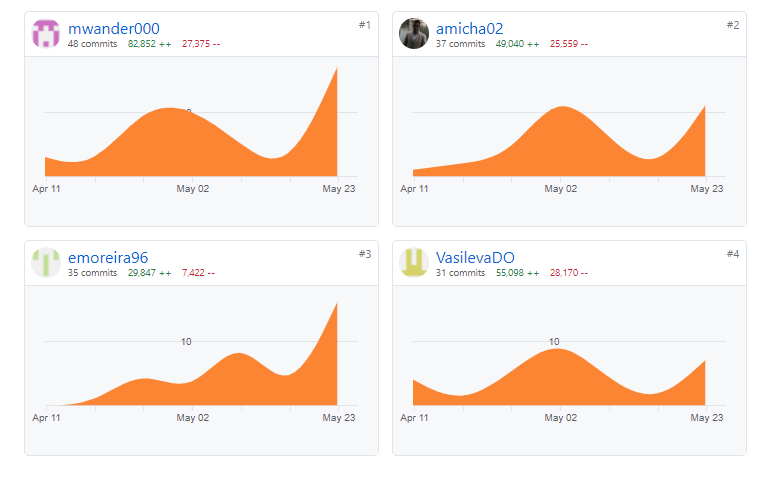